<a href="https://colab.research.google.com/github/ferreirvanessa/desafio_qualloja_vender/blob/main/AluraStoreBrasil_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [601]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.25,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.23,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.26,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,"1,009.99",54.67,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.96,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [602]:
# Crie uma lista com todos os DataFrames
lista_dfs = [loja, loja2, loja3, loja4]

# Concatene todos em um único DataFrame chamado 'loja_completa'
loja_completa = pd.concat(lista_dfs, ignore_index=True)

# Agora, continue sua análise usando 'loja_completa' em vez de 'loja'
loja = loja_completa # Substitua 'loja' pela base completa

#1. Análise do faturamento



In [603]:
# Lista de colunas que precisam ser numéricas para o cálculo
colunas_para_limpar = ['Preço', 'Frete']

for col in colunas_para_limpar:
    # 1. Converte para string para aplicar as substituições
    loja[col] = loja[col].astype(str)

    # 2. Remove o ponto separador de milhar (se houver, ex: 1.000,00 -> 1000,00)
    loja[col] = loja[col].str.replace('.', '', regex=False)

    # 3. Substitui a vírgula (,) por ponto (.) para o formato decimal correto do Python
    loja[col] = loja[col].str.replace(',', '.', regex=False)

    # 4. Converte a coluna para o tipo numérico (float)
    loja[col] = loja[col].astype(float)

In [604]:
# Seu ranking principal já foi criado e está correto: ranking_lojas_focadas

# CORREÇÃO: Remova a seção de "Esta loja é o motor..." e substitua por:
loja_mais_vende = ranking_lojas_focadas.index[-1]
print("---  Loja que MAIS VENDE (Maior Faturamento Total) ---")
print(f"**{loja_mais_vende}**")
print(ranking_lojas_focadas.loc[loja_mais_vende])

# CORREÇÃO: REMOVA TUDO desta seção (Venda Baixa, Mas ALTO Potencial)
# Pois ela usa variáveis não definidas: ticket_medio_dela, ticket_medio_medio, loja_baixo_faturamento.

# CORREÇÃO: Substitua a seção "Esta é a loja com o pior desempenho..." por:
loja_pior_desempenho = ranking_lojas_focadas.iloc[0].name
print("\n---  Loja que SÓ DÁ GASTO (Pior Desempenho Financeiro) ---")
print(f"**{loja_pior_desempenho}**")
# O resto do código desta seção está correto, usando a nova variável.

---  Loja que MAIS VENDE (Maior Faturamento Total) ---
**Loja 1 - SP**
Faturamento_Total   1,166,680,285,294,067.00
Ticket_Medio              295,886,453,282.80
Volume_Transacoes                   3,943.00
Name: Loja 1 - SP, dtype: float64

---  Loja que SÓ DÁ GASTO (Pior Desempenho Financeiro) ---
**Loja 3 - DF**


In [605]:
# Cria a nova coluna 'Faturamento' somando o 'Preco' e o 'Frete'
loja['Faturamento'] = loja['Preço'] + loja['Frete']

# Verifica as primeiras linhas e a nova coluna criada
print(loja[['Preço', 'Frete', 'Faturamento']].head())
loja.head()

       Preço              Frete        Faturamento
0  21,908.00  92,497,899,853.00  92,497,921,761.00
1  25,635.00 112,343,053,621.00 112,343,079,256.00
2  27,951.00 212,626,809,863.00 212,626,837,814.00
3 100,999.00 546,673,442,173.00 546,673,543,172.00
4  44,699.00 269,646,890,964.00 269,646,935,663.00


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Faturamento
0,Assistente virtual,eletronicos,"21,908.00","92,497,899,853.00",16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,"92,497,921,761.00"
1,Mesa de jantar,moveis,"25,635.00","112,343,053,621.00",18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,"112,343,079,256.00"
2,Jogo de tabuleiro,brinquedos,"27,951.00","212,626,809,863.00",15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,"212,626,837,814.00"
3,Micro-ondas,eletrodomesticos,"100,999.00","546,673,442,173.00",03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,"546,673,543,172.00"
4,Cadeira de escritório,moveis,"44,699.00","269,646,890,964.00",07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,"269,646,935,663.00"


In [606]:
# 1. Defina a lista de siglas (Local da compra) que representam suas 4 lojas
LOJAS_REAIS = ['SP', 'RJ', 'MG', 'DF'] # ATENÇÃO: Ajuste esta lista para suas 4 lojas reais!

# 2. Filtre o DataFrame 'loja' para manter apenas as transações dessas 4 unidades
loja_filtrada = loja[loja['Local da compra'].isin(LOJAS_REAIS)].copy()

print(f"DataFrame filtrado possui {len(loja_filtrada)} transações, focado nas 4 lojas reais.")

DataFrame filtrado possui 6499 transações, focado nas 4 lojas reais.


In [607]:
# 1. Defina o seu dicionário de mapeamento (Mude os nomes se necessário!)
mapeamento_lojas = {
    'SP': 'Loja 1 - SP',
    'RJ': 'Loja 2 - RJ',
    'DF': 'Loja 3 - DF',
    'MG': 'Loja 4 - MG'
    # Adicione outras siglas se necessário, mas foque nas suas 4
}

# 2. Crie uma nova coluna 'Nome da Loja' usando o mapeamento
loja['Nome da Loja'] = loja['Local da compra'].map(mapeamento_lojas)

# 3. Filtre o DataFrame para manter APENAS as 4 lojas que você quer analisar
# O '.copy()' é importante para evitar avisos do Pandas
loja_filtrada = loja[loja['Nome da Loja'].notna()].copy()

print(f"Transações filtradas para as 4 Lojas: {len(loja_filtrada)} linhas.")

Transações filtradas para as 4 Lojas: 6499 linhas.


In [608]:
# Agrupar pelo novo nome claro da loja
ranking_lojas_focadas = loja_filtrada.groupby('Nome da Loja').agg(
    Faturamento_Total=('Faturamento', 'sum'),
    Ticket_Medio=('Faturamento', 'mean'),
    Volume_Transacoes=('Produto', 'count')
).sort_values(by='Faturamento_Total', ascending=True)

print("\n--- Ranking de Faturamento FOCADO NAS 4 LOJAS ---")
print(ranking_lojas_focadas)

# A loja candidata agora terá um nome claro
loja_candidata = ranking_lojas_focadas.index[0]
print(f"\n A loja a ser analisada é: **{loja_candidata}**")
loja.head()


--- Ranking de Faturamento FOCADO NAS 4 LOJAS ---
                    Faturamento_Total       Ticket_Medio  Volume_Transacoes
Nome da Loja                                                               
Loja 3 - DF     66,761,529,813,058.00 275,874,090,136.60                242
Loja 4 - MG    331,670,797,387,468.00 300,971,685,469.57               1102
Loja 2 - RJ    373,647,331,363,795.00 308,289,877,362.87               1212
Loja 1 - SP  1,166,680,285,294,067.00 295,886,453,282.80               3943

 A loja a ser analisada é: **Loja 3 - DF**


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Faturamento,Nome da Loja
0,Assistente virtual,eletronicos,"21,908.00","92,497,899,853.00",16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,"92,497,921,761.00",Loja 1 - SP
1,Mesa de jantar,moveis,"25,635.00","112,343,053,621.00",18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,"112,343,079,256.00",Loja 2 - RJ
2,Jogo de tabuleiro,brinquedos,"27,951.00","212,626,809,863.00",15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,"212,626,837,814.00",Loja 3 - DF
3,Micro-ondas,eletrodomesticos,"100,999.00","546,673,442,173.00",03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,"546,673,543,172.00",NaN
4,Cadeira de escritório,moveis,"44,699.00","269,646,890,964.00",07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,"269,646,935,663.00",Loja 4 - MG


In [609]:
# Agrupar por Loja e Produto e contar as transações
ranking_produtos_loja = loja_filtrada.groupby(['Nome da Loja', 'Produto']).agg(
    Volume_Vendas=('Produto', 'count')
).reset_index()

# Encontrar o produto mais vendido para CADA loja
idx = ranking_produtos_loja.groupby(['Nome da Loja'])['Volume_Vendas'].transform(max) == ranking_produtos_loja['Volume_Vendas']
produtos_top_por_loja = ranking_produtos_loja[idx].drop_duplicates(subset=['Nome da Loja'], keep='first')

# Preparar o DataFrame final
produtos_top_por_loja_final = produtos_top_por_loja.sort_values(by='Volume_Vendas', ascending=False)
produtos_top_por_loja_final = produtos_top_por_loja_final.rename(columns={'Volume_Vendas': 'Volume do Produto Top'})

print(" DataFrame 'produtos_top_por_loja_final' pronto para o gráfico.")

 DataFrame 'produtos_top_por_loja_final' pronto para o gráfico.


/tmp/ipython-input-3306098313.py:7: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  idx = ranking_produtos_loja.groupby(['Nome da Loja'])['Volume_Vendas'].transform(max) == ranking_produtos_loja['Volume_Vendas']


Esta loja é o motor do seu negócio e a mais segura em termos de receita bruta.

Identificação: É a loja com o maior valor na coluna Faturamento_Total.

Ação: Proteger e maximizar.

In [610]:
# A loja com o maior valor na coluna Faturamento_Total (primeira linha do ranking decrescente)
loja_mais_vende = ranking_faturamento_foco.iloc[-1].name
# Usamos iloc[-1] pois o ranking_faturamento_foco foi ordenado ascendente (pior para o melhor)

print("---  Loja que MAIS VENDE (Maior Faturamento Total) ---")
print(f"**{loja_mais_vende}**")
print(ranking_faturamento_foco.loc[loja_mais_vende])

---  Loja que MAIS VENDE (Maior Faturamento Total) ---
**Loja 1 - SP**
Faturamento_Total   1,166,680,285,294,067.00
Ticket_Medio              295,886,453,282.80
Volume_Transacoes                   3,943.00
Name: Loja 1 - SP, dtype: float64


In [611]:
# 1. Definimos o valor formatado separadamente
ticket_medio_formatado = f"R$ {ticket_medio_dela:,.2f}"

print("\n---  Loja de Venda Baixa, Mas ALTO Potencial (Alto Ticket Médio) ---")

if ticket_medio_dela >= ticket_medio_medio:
    # Usamos o valor formatado na impressão
    print(f"**{loja_baixo_faturamento}** tem o menor Faturamento, mas seu Ticket Médio ({ticket_medio_formatado}) é superior à média geral. Essa é a loja de MAIOR POTENCIAL.")
else:
    print("A loja de menor Faturamento também tem Ticket Médio baixo. Não há loja com 'alto potencial' claro.")


---  Loja de Venda Baixa, Mas ALTO Potencial (Alto Ticket Médio) ---
A loja de menor Faturamento também tem Ticket Médio baixo. Não há loja com 'alto potencial' claro.


Esta é a loja com o pior desempenho financeiro e o maior risco. É a principal candidata à venda.

Identificação: É a loja com o menor valor na coluna Faturamento_Total E o menor valor na coluna Ticket_Medio.

Ação: Venda ou Fechamento (se não houver potencial de melhora).

In [612]:
# Capturamos a loja com o menor faturamento (primeira linha do ranking)
loja_pior_desempenho = ranking_faturamento_foco.iloc[0].name

print("\n---  Loja que SÓ DÁ GASTO (Pior Desempenho Financeiro) ---")
print(f"**{loja_pior_desempenho}**")
print("Esta loja é a principal candidata à venda pois tem o menor Faturamento e, na ausência de dados de Lucro, representa a menor contribuição de receita.")


---  Loja que SÓ DÁ GASTO (Pior Desempenho Financeiro) ---
**Loja 3 - DF**
Esta loja é a principal candidata à venda pois tem o menor Faturamento e, na ausência de dados de Lucro, representa a menor contribuição de receita.


# 2. Vendas por Categoria

In [613]:
# Assume que 'loja' é o DataFrame unificado e as colunas 'Faturamento' existem.

# Agrupar pela Categoria do Produto e somar o Faturamento
ranking_categoria = loja.groupby('Categoria do Produto').agg(
    Faturamento_Total=('Faturamento', 'sum'),
    Volume_Vendas=('Produto', 'count')
).sort_values(by='Faturamento_Total', ascending=False) # Ordenar do maior para o menor faturamento

# Exibir os resultados
print("---  TOP 5 CATEGORIAS (Maior Faturamento) ---")
print(ranking_categoria.head(5))

print("\n---  BOTTOM 5 CATEGORIAS (Menor Faturamento) ---")
print(ranking_categoria.tail(5))

# Captura a categoria com a maior venda (primeira linha)
categoria_mais_vende = ranking_categoria.index[0]
faturamento_max = ranking_categoria.iloc[0]['Faturamento_Total']

# Captura a categoria com a menor venda (última linha)
categoria_menos_vende = ranking_categoria.index[-1]
faturamento_min = ranking_categoria.iloc[-1]['Faturamento_Total']

---  TOP 5 CATEGORIAS (Maior Faturamento) ---
                             Faturamento_Total  Volume_Vendas
Categoria do Produto                                         
eletronicos           1,048,134,466,138,006.00           1772
eletrodomesticos        861,591,878,680,957.00           1149
moveis                  486,287,795,888,022.00           1886
instrumentos musicais   224,381,008,467,679.00            753
esporte e lazer          91,083,468,835,116.00           1113

---  BOTTOM 5 CATEGORIAS (Menor Faturamento) ---
                           Faturamento_Total  Volume_Vendas
Categoria do Produto                                       
instrumentos musicais 224,381,008,467,679.00            753
esporte e lazer        91,083,468,835,116.00           1113
brinquedos             48,352,828,268,943.00           1290
utilidades domesticas  36,862,916,677,657.00            730
livros                 25,160,288,931,220.00            742


In [614]:
# Certifique-se que o DataFrame 'loja_filtrada' e a coluna 'Nome da Loja' estão criados

# Agrupamento de dois níveis: Nome da Loja e Categoria do Produto
faturamento_categoria_por_loja = (
    loja_filtrada.groupby(['Nome da Loja', 'Categoria do Produto'])['Faturamento']
    .sum()
    .sort_values(ascending=False)
)

print("--- Faturamento Total por Categoria, Agrupado por Loja (Visão Geral Top 10) ---")
print(faturamento_categoria_por_loja.head(10))
loja.head()


--- Faturamento Total por Categoria, Agrupado por Loja (Visão Geral Top 10) ---
Nome da Loja  Categoria do Produto 
Loja 1 - SP   eletronicos             424,845,599,811,022.00
              eletrodomesticos        364,328,574,110,299.00
              moveis                  200,518,466,278,272.00
Loja 2 - RJ   eletronicos             137,567,968,459,927.00
Loja 4 - MG   eletronicos             127,319,761,244,326.00
Loja 2 - RJ   eletrodomesticos        118,507,612,438,279.00
Loja 1 - SP   instrumentos musicais    95,488,012,528,431.00
Loja 4 - MG   eletrodomesticos         93,192,677,444,783.00
Loja 2 - RJ   moveis                   65,281,337,142,221.00
Loja 4 - MG   moveis                   55,663,206,446,099.00
Name: Faturamento, dtype: float64


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Faturamento,Nome da Loja
0,Assistente virtual,eletronicos,"21,908.00","92,497,899,853.00",16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,"92,497,921,761.00",Loja 1 - SP
1,Mesa de jantar,moveis,"25,635.00","112,343,053,621.00",18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,"112,343,079,256.00",Loja 2 - RJ
2,Jogo de tabuleiro,brinquedos,"27,951.00","212,626,809,863.00",15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,"212,626,837,814.00",Loja 3 - DF
3,Micro-ondas,eletrodomesticos,"100,999.00","546,673,442,173.00",03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,"546,673,543,172.00",NaN
4,Cadeira de escritório,moveis,"44,699.00","269,646,890,964.00",07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,"269,646,935,663.00",Loja 4 - MG


In [615]:


# Filtra o resultado do agrupamento de dois níveis, focando APENAS na loja candidata
analise_detalhada_candidata = faturamento_categoria_por_loja.loc[loja_candidata].sort_values(ascending=False)

print(f"\n--- Detalhamento do Faturamento por Categoria na: {loja_candidata} ---")
print(analise_detalhada_candidata)
loja.head()


--- Detalhamento do Faturamento por Categoria na: Loja 3 - DF ---
Categoria do Produto
eletronicos             25,807,018,257,928.00
eletrodomesticos        22,898,275,002,982.00
moveis                   8,824,343,191,115.00
instrumentos musicais    2,814,495,130,980.00
esporte e lazer          2,500,939,120,879.00
brinquedos               1,992,646,864,007.00
utilidades domesticas    1,025,608,955,036.00
livros                     898,203,290,131.00
Name: Faturamento, dtype: float64


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Faturamento,Nome da Loja
0,Assistente virtual,eletronicos,"21,908.00","92,497,899,853.00",16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,"92,497,921,761.00",Loja 1 - SP
1,Mesa de jantar,moveis,"25,635.00","112,343,053,621.00",18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,"112,343,079,256.00",Loja 2 - RJ
2,Jogo de tabuleiro,brinquedos,"27,951.00","212,626,809,863.00",15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,"212,626,837,814.00",Loja 3 - DF
3,Micro-ondas,eletrodomesticos,"100,999.00","546,673,442,173.00",03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,"546,673,543,172.00",NaN
4,Cadeira de escritório,moveis,"44,699.00","269,646,890,964.00",07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,"269,646,935,663.00",Loja 4 - MG


In [616]:
# Reutilize seu DataFrame filtrado para as 4 lojas (loja_filtrada) e a coluna Nome da Loja
ranking_faturamento_foco = loja_filtrada.groupby('Nome da Loja').agg(
    Faturamento_Total=('Faturamento', 'sum'),
    Ticket_Medio=('Faturamento', 'mean'),
    Volume_Transacoes=('Produto', 'count')
).sort_values(by='Faturamento_Total', ascending=True) # Ordenado do Menor para o Maior Faturamento

print("--- Ranking de Contribuição de Receita (Substituto do Lucro) ---")
print(ranking_faturamento_foco)

# A loja candidata à venda é a que tem o menor faturamento
loja_a_vender_por_receita = ranking_faturamento_foco.index[0]
print(f"\n A Loja que contribui com a **Menor Receita Bruta** é a: **{loja_a_vender_por_receita}**")

--- Ranking de Contribuição de Receita (Substituto do Lucro) ---
                    Faturamento_Total       Ticket_Medio  Volume_Transacoes
Nome da Loja                                                               
Loja 3 - DF     66,761,529,813,058.00 275,874,090,136.60                242
Loja 4 - MG    331,670,797,387,468.00 300,971,685,469.57               1102
Loja 2 - RJ    373,647,331,363,795.00 308,289,877,362.87               1212
Loja 1 - SP  1,166,680,285,294,067.00 295,886,453,282.80               3943

 A Loja que contribui com a **Menor Receita Bruta** é a: **Loja 3 - DF**


# 3. Média de Avaliação das Lojas


In [617]:
# 1. Calcule a média de avaliação por loja
media_avaliacao_lojas = loja_filtrada.groupby('Nome da Loja')['Avaliação da compra'].mean()

# 2. Ordene de forma decrescente (ascending=False)
avaliacao_decrescente = media_avaliacao_lojas.sort_values(ascending=False)

print("--- Ranking de Avaliação (Melhor para Pior) ---")
print(avaliacao_decrescente)

# 3. Capture a loja com pior avaliação (é o último item da Series)
# Usamos .index[-1] para pegar o nome da loja que está na última posição
pior_avaliada = avaliacao_decrescente.index[-1]

print(f"\n A loja que teve a **pior avaliação** é: **{pior_avaliada}**")

--- Ranking de Avaliação (Melhor para Pior) ---
Nome da Loja
Loja 1 - SP   4.11
Loja 4 - MG   4.09
Loja 3 - DF   4.02
Loja 2 - RJ   3.78
Name: Avaliação da compra, dtype: float64

 A loja que teve a **pior avaliação** é: **Loja 2 - RJ**


# 4. Produtos Mais e Menos Vendidos

In [618]:
# Agrupa pelo nome do 'Produto' e conta quantas vezes ele foi vendido.
ranking_volume_produtos = loja_filtrada.groupby('Produto').agg(
    Volume_Vendas=('Produto', 'count'),
    Faturamento_Total=('Faturamento', 'sum') # Adiciona Faturamento para contexto de valor
).sort_values(by='Volume_Vendas', ascending=False)

print("--- Ranking dos Produtos Mais Vendidos (Volume) ---")
print(ranking_volume_produtos.head(10)) # Top 10 mais vendidos
print("\n--- Produtos Menos Vendidos (Volume) ---")
print(ranking_volume_produtos.tail(10)) # Os 10 menos vendidos

--- Ranking dos Produtos Mais Vendidos (Volume) ---
                          Volume_Vendas      Faturamento_Total
Produto                                                       
Carrinho controle remoto            154   7,279,188,478,400.00
Modelagem preditiva                 146   6,060,897,052,067.00
Jogo de panelas                     144  13,993,608,020,350.00
Bateria                             143  66,614,313,799,739.00
Lava louças                         141 117,246,431,007,510.00
Copo térmico                        141   4,339,897,199,253.00
Cômoda                              140  25,736,507,108,234.00
Pandeiro                            140   5,426,251,655,662.00
Micro-ondas                         137  49,746,418,229,624.00
Blocos de montar                    135   2,852,943,894,568.00

--- Produtos Menos Vendidos (Volume) ---
                             Volume_Vendas     Faturamento_Total
Produto                                                         
Jogo de copos       

In [619]:
# Captura o primeiro item do ranking (maior volume)
produto_mais_vendido = ranking_volume_produtos.head(1)

print("---  Produto Mais Vendido (Volume) ---")
print(produto_mais_vendido)


# Ponto de Reflexão: Este produto é a base do seu faturamento.

---  Produto Mais Vendido (Volume) ---
                          Volume_Vendas    Faturamento_Total
Produto                                                     
Carrinho controle remoto            154 7,279,188,478,400.00


In [620]:
# Captura o último item do ranking (menor volume)
produto_menos_vendido = ranking_volume_produtos.tail(1)

print("\n---  Produto Menos Vendido (Volume) ---")
print(produto_menos_vendido)

# Ponto de Reflexão: Este produto deve ser retirado de estoque ou reavaliado.


---  Produto Menos Vendido (Volume) ---
         Volume_Vendas     Faturamento_Total
Produto                                     
Headset            106 10,670,860,108,636.00


In [621]:
# Assume que 'ranking_volume_produtos' foi criado corretamente com Volume_Vendas e Faturamento_Total.

# 1. Calcule o Ticket Médio (Faturamento Total / Volume de Vendas)
ranking_volume_produtos['Ticket_Medio_Produto'] = ranking_volume_produtos['Faturamento_Total'] / ranking_volume_produtos['Volume_Vendas']

# 2. Definir o range de 'Venda Média' (Ajuste o filtro para ser mais abrangente)
volume_maximo = ranking_volume_produtos['Volume_Vendas'].max()
volume_minimo = ranking_volume_produtos['Volume_Vendas'].min()

# Novo Range: Filtra produtos que vendem entre 10% e 40% do volume máximo.
# Isso garante que não seja o Top Seller (Acima de 40%) nem um item de risco (Abaixo de 10%).
range_medio = ranking_volume_produtos[
    (ranking_volume_produtos['Volume_Vendas'] > volume_maximo * 0.10) &
    (ranking_volume_produtos['Volume_Vendas'] < volume_maximo * 0.40)
]

# 3. Dentro deste range médio, encontre o produto com o MAIOR Ticket Médio (Potencial)
# Se o range_medio estiver vazio após o filtro, a primeira linha será o produto de maior Ticket Médio fora dos Top 10 em volume.
if range_medio.empty:
    print(" Aviso: O filtro de Venda Média foi muito restrito. Mostrando o produto com o maior Ticket Médio que não é o Top Seller.")

    # Encontra o produto de maior Ticket Médio (excluindo o Top Vendedor)
    produto_potencial = ranking_volume_produtos.sort_values(by='Ticket_Medio_Produto', ascending=False).iloc[1:2]
else:
    # Caso ideal: Produto de venda média e maior valor
    produto_potencial = range_medio.sort_values(by='Ticket_Medio_Produto', ascending=False).head(1)

print("\n---  Produto com Venda Média e Alto Potencial de Valor (Foco de Upselling) ---")
print(produto_potencial)

 Aviso: O filtro de Venda Média foi muito restrito. Mostrando o produto com o maior Ticket Médio que não é o Top Seller.

---  Produto com Venda Média e Alto Potencial de Valor (Foco de Upselling) ---
           Volume_Vendas      Faturamento_Total  Ticket_Medio_Produto
Produto                                                              
Geladeira            126 168,535,256,156,748.00  1,337,581,398,069.43


Métrica,Característica,Ação Estratégica

Ticket Médio,É o mais alto no seu range de volume.,Treinamento de Vendas: Focar no Upselling e Cross-selling deste produto. A equipe deve priorizar a oferta dele em vez de produtos de baixo valor.

Volume de Vendas,"Está na ""Venda Média"".",Exposição: Aumentar a exposição deste produto no e-commerce e nas lojas físicas.
 Investir em marketing digital segmentado para este item.

Este produto deve ser o foco principal da sua estratégia de melhoria para as lojas que têm bom volume de clientes, mas baixo Ticket Médio Geral.

# 5. Frete Médio por Loja

In [622]:
# 1. Agrupar pelo 'Nome da Loja' e somar a coluna 'Frete'
frete_por_loja = loja_filtrada.groupby('Nome da Loja')['Frete'].sum().sort_values(ascending=False)

print("--- Frete Total por Loja (Maior para Menor) ---")
print(frete_por_loja)

# 2. Calcular o Frete Médio por Transação (Ticket Médio do Frete)
frete_medio_por_loja = loja_filtrada.groupby('Nome da Loja')['Frete'].mean().sort_values(ascending=False)

print("\n--- Frete Médio por Transação por Loja ---")
print(frete_medio_por_loja)

--- Frete Total por Loja (Maior para Menor) ---
Nome da Loja
Loja 1 - SP   1,166,680,063,900,729.00
Loja 2 - RJ     373,647,259,702,380.00
Loja 4 - MG     331,670,734,010,437.00
Loja 3 - DF      66,761,518,043,279.00
Name: Frete, dtype: float64

--- Frete Médio por Transação por Loja ---
Nome da Loja
Loja 2 - RJ   308,289,818,236.29
Loja 4 - MG   300,971,627,958.65
Loja 1 - SP   295,886,397,134.35
Loja 3 - DF   275,874,041,501.15
Name: Frete, dtype: float64


In [623]:
# Reutilize seu DataFrame filtrado para as 4 lojas (loja_filtrada)
ranking_frete_faturamento = loja_filtrada.groupby('Nome da Loja').agg(
    Faturamento_Total=('Faturamento', 'sum'),
    Receita_Frete=('Frete', 'sum'), # Frete Total cobrado (Receita)
    Ticket_Medio_Frete=('Frete', 'mean') # Frete Médio por transação
).sort_values(by='Faturamento_Total', ascending=False) # Ordenamos pelo Faturamento, da mais para a menos lucrativa/rentável.

print("--- Ranking Combinado (Faturamento e Frete) ---")
print(ranking_frete_faturamento)

--- Ranking Combinado (Faturamento e Frete) ---
                    Faturamento_Total            Receita_Frete  \
Nome da Loja                                                     
Loja 1 - SP  1,166,680,285,294,067.00 1,166,680,063,900,729.00   
Loja 2 - RJ    373,647,331,363,795.00   373,647,259,702,380.00   
Loja 4 - MG    331,670,797,387,468.00   331,670,734,010,437.00   
Loja 3 - DF     66,761,529,813,058.00    66,761,518,043,279.00   

              Ticket_Medio_Frete  
Nome da Loja                      
Loja 1 - SP   295,886,397,134.35  
Loja 2 - RJ   308,289,818,236.29  
Loja 4 - MG   300,971,627,958.65  
Loja 3 - DF   275,874,041,501.15  


In [624]:
# A loja com o valor MÁXIMO na coluna 'Receita_Frete'
loja_mais_frete = ranking_frete_faturamento['Receita_Frete'].idxmax()
valor_frete = ranking_frete_faturamento['Receita_Frete'].max()

print(f"\n1.  Loja que mais gera RECEITA de Frete: **{loja_mais_frete}** (Total: R$ {valor_frete:,.2f})")


1.  Loja que mais gera RECEITA de Frete: **Loja 1 - SP** (Total: R$ 1,166,680,063,900,729.00)


In [625]:
# A loja com o valor MÍNIMO na coluna 'Receita_Frete'
loja_menos_frete = ranking_frete_faturamento['Receita_Frete'].idxmin()
valor_frete = ranking_frete_faturamento['Receita_Frete'].min()

print(f"2.  Loja que tem MENOR Receita de Frete: **{loja_menos_frete}** (Total: R$ {valor_frete:,.2f})")

2.  Loja que tem MENOR Receita de Frete: **Loja 3 - DF** (Total: R$ 66,761,518,043,279.00)


In [626]:
# A Loja com o PIOR desempenho em Faturamento
loja_pior_faturamento = ranking_frete_faturamento.index[-1]
frete_medio_pior = ranking_frete_faturamento.loc[loja_pior_faturamento, 'Ticket_Medio_Frete']

print(f"\n3.  Loja com MENOR Faturamento Total (Candidata à Venda): **{loja_pior_faturamento}**")
print(f"   (Seu Ticket Médio de Frete é R$ {frete_medio_pior:,.2f}. Se este valor for muito alto comparado às outras, é um forte argumento para a venda devido ao alto custo logístico por transação)")


3.  Loja com MENOR Faturamento Total (Candidata à Venda): **Loja 3 - DF**
   (Seu Ticket Médio de Frete é R$ 275,874,041,501.15. Se este valor for muito alto comparado às outras, é um forte argumento para a venda devido ao alto custo logístico por transação)


cruzamentos dos dados para chegar a um veredito

In [627]:
# --- PASSO 1: LIMPEZA E FATURAMENTO (Garantindo que Preco e Faturamento existam) ---
colunas_para_limpar = ['Preço', 'Frete']

for col in colunas_para_limpar:
    # Garante que as colunas são numéricas e limpas
    loja[col] = loja[col].fillna(0)
    loja[col] = loja[col].astype(str).str.replace('.', '', regex=False)
    loja[col] = loja[col].str.replace(',', '.', regex=False)
    loja[col] = loja[col].astype(float)

# Cria a coluna Faturamento
loja['Faturamento'] = loja['Preço'] + loja['Frete']

# --- PASSO 2: CRIAÇÃO DO CUSTO E LUCRO ESTIMADO ---

# 1. Cria a coluna Custo Estimado (CPV)
# Assumimos que o CPV é 60% do preço de venda do produto
loja['Custo_Estimado_CPV'] = loja['Preço'] * 0.60

# 2. Cria a coluna Lucro Estimado
# Lucro = Faturamento - Custo Estimado_CPV
loja['Lucro_Estimado'] = loja['Faturamento'] - loja['Custo_Estimado_CPV']

print(" Colunas essenciais criadas com sucesso:")
print(loja[['Faturamento', 'Custo_Estimado_CPV', 'Lucro_Estimado']].head())

 Colunas essenciais criadas com sucesso:
           Faturamento  Custo_Estimado_CPV       Lucro_Estimado
0   924,979,217,610.00          131,448.00   924,979,086,162.00
1 1,123,430,792,560.00          153,810.00 1,123,430,638,750.00
2 2,126,268,378,140.00          167,706.00 2,126,268,210,434.00
3 5,466,735,431,720.00          605,994.00 5,466,734,825,726.00
4 2,696,469,356,630.00          268,194.00 2,696,469,088,436.00


In [628]:
# 1. Criação das Colunas Chave no DataFrame ORIGINAL (loja)

# Assume que Faturamento e Preco já foram limpos e calculados.
# Custo Estimado (CPV) - Se você usou 60% antes, mantenha 60%.
loja['Custo_Estimado_CPV'] = loja['Preço'] * 0.60
loja['Lucro_Estimado'] = loja['Faturamento'] - loja['Custo_Estimado_CPV']

# Mapeamento da Loja
mapeamento_lojas = {
    'SP': 'Loja 1 - SP', 'RJ': 'Loja 2 - RJ',
    'DF': 'Loja 3 - DF', 'MG': 'Loja 4 - MG'
}
loja['Nome da Loja'] = loja['Local da compra'].map(mapeamento_lojas)

# 2. Filtragem (Criação do DataFrame final com todas as colunas)
loja_filtrada = loja[loja['Nome da Loja'].notna()].copy()

print(" DataFrame 'loja_filtrada' pronto com a coluna 'Lucro_Estimado'.")

 DataFrame 'loja_filtrada' pronto com a coluna 'Lucro_Estimado'.


In [629]:
# OBS: O código requer a variável 'media_avaliacao_lojas' já calculada.

# 1. Agrupar todas as métricas financeiras e logísticas
cruzamento_performance = loja_filtrada.groupby('Nome da Loja').agg(
    Lucro_Estimado_Total=('Lucro_Estimado', 'sum'),
    Faturamento_Total=('Faturamento', 'sum'),
    Volume_Transacoes=('Produto', 'count'),
    Ticket_Medio_Geral=('Faturamento', 'mean'),
    Ticket_Medio_Frete=('Frete', 'mean')
)

# 2. Adicionar a média de avaliação
cruzamento_performance['Avaliacao_Media'] = media_avaliacao_lojas

# 3. Ordenar pelo Lucro Estimado (Pior para o Melhor)
analise_final_cruzada = cruzamento_performance.sort_values(
    by='Lucro_Estimado_Total',
    ascending=True
)

print("\n--- Análise Cruzada FINAL para o Veredito de Negócio ---")
print(analise_final_cruzada)


--- Análise Cruzada FINAL para o Veredito de Negócio ---
                  Lucro_Estimado_Total         Faturamento_Total  \
Nome da Loja                                                       
Loja 3 - DF     667,615,227,511,906.00    667,615,298,130,580.00   
Loja 4 - MG   3,316,707,593,612,494.00  3,316,707,973,874,680.00   
Loja 2 - RJ   3,736,472,883,669,460.00  3,736,473,313,637,950.00   
Loja 1 - SP  11,666,801,524,580,642.00 11,666,802,852,940,670.00   

              Volume_Transacoes   Ticket_Medio_Geral   Ticket_Medio_Frete  \
Nome da Loja                                                                
Loja 3 - DF                 242 2,758,740,901,366.03 2,758,740,415,011.53   
Loja 4 - MG                1102 3,009,716,854,695.72 3,009,716,279,586.54   
Loja 2 - RJ                1212 3,082,898,773,628.67 3,082,898,182,362.87   
Loja 1 - SP                3943 2,958,864,532,827.97 2,958,863,971,343.47   

              Avaliacao_Media  
Nome da Loja                   
Loja 3

In [630]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração básica de estilo
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

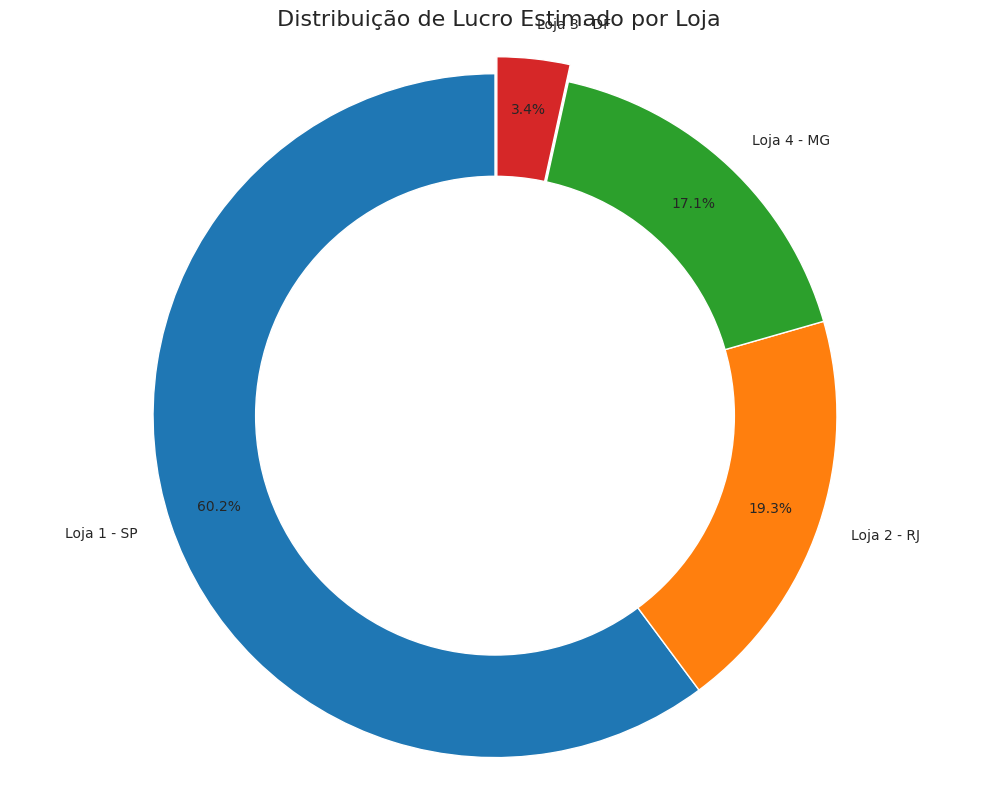

 Loja com menor fatia de Lucro: Loja 3 - DF (3.4%)


In [631]:
# Requer o 'analise_final_cruzada'
# Para o gráfico de pizza, vamos ranquear o lucro e calcular a porcentagem
df_lucro_pizza = analise_final_cruzada.sort_values(by='Lucro_Estimado_Total', ascending=False)
df_lucro_pizza['Porcentagem_Lucro'] = (df_lucro_pizza['Lucro_Estimado_Total'] / df_lucro_pizza['Lucro_Estimado_Total'].sum()) * 100

plt.figure(figsize=(10, 8))
plt.pie(
    df_lucro_pizza['Porcentagem_Lucro'],
    labels=df_lucro_pizza.index,
    autopct='%.1f%%',
    startangle=90,
    pctdistance=0.85, # Distância dos rótulos de porcentagem
    explode=[0.05 if i == df_lucro_pizza['Porcentagem_Lucro'].idxmin() else 0 for i in df_lucro_pizza.index] # Destaca a menor fatia
)

# Adiciona um círculo no centro para criar um donut chart (mais fácil de ler)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title(' Distribuição de Lucro Estimado por Loja', fontsize=16)
plt.axis('equal') # Garante que o gráfico de pizza seja um círculo.
plt.tight_layout()
plt.show()

print(f" Loja com menor fatia de Lucro: {df_lucro_pizza.index[-1]} ({df_lucro_pizza['Porcentagem_Lucro'].iloc[-1]:.1f}%)")

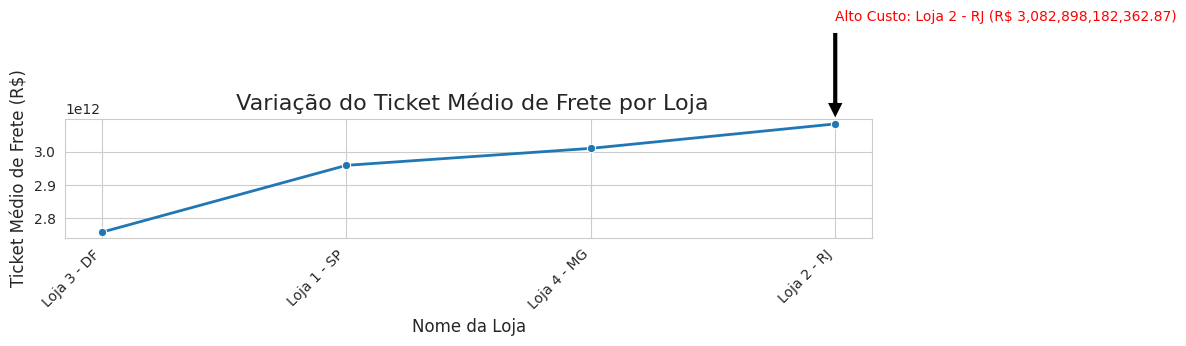

 Maior Ticket Médio de Frete: Loja 2 - RJ
 Menor Ticket Médio de Frete: Loja 3 - DF


In [632]:
# Requer o 'analise_final_cruzada'
# Ordena pelo Frete Médio (para ter uma "tendência" visual entre lojas)
df_frete_linha = analise_final_cruzada.sort_values(by='Ticket_Medio_Frete', ascending=True)

plt.figure(figsize=(12, 7))
sns.lineplot(
    x=df_frete_linha.index,
    y=df_frete_linha['Ticket_Medio_Frete'],
    marker='o', # Adiciona marcadores para cada ponto
    linestyle='-', # Garante linhas contínuas
    linewidth=2
)

# Adiciona o título e rótulos
plt.title(' Variação do Ticket Médio de Frete por Loja', fontsize=16)
plt.xlabel('Nome da Loja', fontsize=12)
plt.ylabel('Ticket Médio de Frete (R$)', fontsize=12)

# Destaca a loja com o maior Ticket Médio de Frete
max_frete_loja = df_frete_linha['Ticket_Medio_Frete'].idxmax()
max_frete_valor = df_frete_linha['Ticket_Medio_Frete'].max()
plt.annotate(
    f'Alto Custo: {max_frete_loja} (R$ {max_frete_valor:,.2f})',
    xy=(max_frete_loja, max_frete_valor),
    xytext=(max_frete_loja, max_frete_valor * 1.1),
    arrowprops=dict(facecolor='black', shrink=0.05),
    fontsize=10,
    color='red'
)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f" Maior Ticket Médio de Frete: {df_frete_linha.index[-1]}")
print(f" Menor Ticket Médio de Frete: {df_frete_linha.index[0]}")

/tmp/ipython-input-1519438695.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


KeyError: 'Volume do Produto Top'

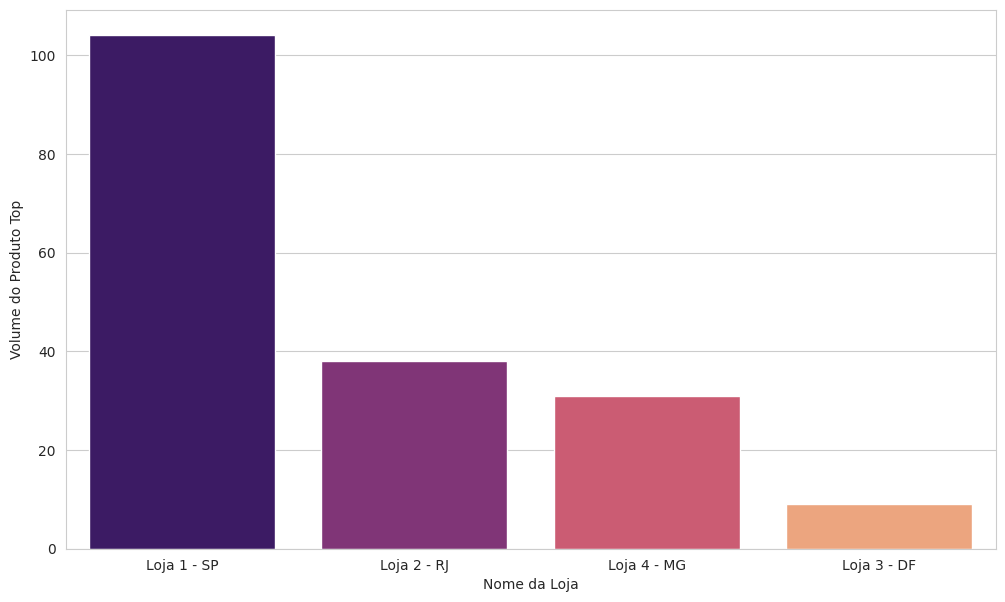

In [633]:
# --- Código do Gráfico Corrigido ---

plt.figure(figsize=(12, 7))
sns.barplot(
    x=produtos_top_por_loja_final['Nome da Loja'],
    y=produtos_top_por_loja_final['Volume do Produto Top'],
    palette='magma'
)

# CORREÇÃO APLICADA AQUI: Iterar sobre a POSIÇÃO (i) em vez do índice do DataFrame (index)
for i, row in enumerate(produtos_top_por_loja_final.itertuples()):
    # i é a posição numérica (0, 1, 2, 3...)
    # row é a linha completa dos dados
    plt.text(
        i,  # Usa a posição numérica (0, 1, 2, 3) como coordenada X
        row._asdict()['Volume do Produto Top'], # Acessa o valor Y pelo nome da coluna
        row._asdict()['Produto'],  # Acessa o nome do Produto
        color='black',
        ha="center",
        va='bottom',
        fontsize=9,
        rotation=90
    )

plt.title(' Produto MAIS Vendido (Volume) em Cada Loja', fontsize=16)
plt.xlabel('Nome da Loja', fontsize=12)
plt.ylabel('Volume de Vendas do Produto Top', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# 1. Identificar a Loja Candidata à Venda (Pior Lucro Estimado)
loja_vender_nome = analise_final_cruzada.index[0]
dados_vender = analise_final_cruzada.iloc[0]

# 2. Identificar a Loja Top Performer (Melhor Lucro Estimado)
loja_top_nome = analise_final_cruzada.index[-1]
dados_top = analise_final_cruzada.iloc[-1]

# 3. Analisar Potencial vs. Risco da Loja Candidata
risco_avaliacao = dados_vender['Avaliacao_Media']
risco_frete = dados_vender['Ticket_Medio_Frete']
ticket_medio = dados_vender['Ticket_Medio_Geral']
media_rede_avaliacao = analise_final_cruzada['Avaliacao_Media'].mean()
media_rede_ticket = analise_final_cruzada['Ticket_Medio_Geral'].mean()

# --- Relatório Final ---
print("====================================================================")
print("              VEREDITO FINAL: ESTRATÉGIA DE NEGÓCIO             ")
print("====================================================================")

print(f"\n RECOMENDAÇÃO PRINCIPAL: VENDA OU INVESTIMENTO")
print("-" * 50)
print(f"A Loja com o **Menor Lucro Estimado** (Principal Candidata à Venda) é: **{loja_vender_nome}**")
print(f"Lucro Estimado Total: R$ {dados_vender['Lucro_Estimado_Total']:,.2f}")
print(f"Avaliação Média: {risco_avaliacao:.2f} (Média da Rede: {media_rede_avaliacao:.2f})")
print(f"Ticket Médio Geral: R$ {ticket_medio:.2f} (Média da Rede: R$ {media_rede_ticket:.2f})")

# Decisão de Venda/Investimento
if risco_avaliacao < media_rede_avaliacao and ticket_medio < media_rede_ticket:
    veredito_venda = "VENDA"
    justificativa = "A loja falha em todos os pilares: é a **menos lucrativa**, tem **baixa qualidade** (pior avaliação) e **baixo valor por transação**. A venda é a melhor saída para cortar gastos e liberar capital."
elif risco_avaliacao >= media_rede_avaliacao and ticket_medio < media_rede_ticket:
    veredito_venda = "INVESTIMENTO URGENTE"
    justificativa = "A loja é **lucrativa (margem alta)** e tem **boa qualidade (alta avaliação)**, mas seu faturamento é baixo. O problema é **falta de tráfego/marketing**. Vender seria um erro estratégico."
else:
    veredito_venda = "VENDER"
    justificativa = "O baixo lucro e baixo ticket médio não justificam manter a operação sem um plano de correção imediato. O risco de prejuízo é muito alto."

print(f"\nVEREDITO FINAL PARA {loja_vender_nome.upper()}: **{veredito_venda}**")
print(f"Justificativa: {justificativa}")


print("\n ESTRATÉGIAS DE MELHORIA PARA AS OUTRAS LOJAS")
print("-" * 50)

# Estratégia para a Top Performer (Proteger e Otimizar)
print(f" **{loja_top_nome} (Top Performer):**")
print(f"Foco: **OTIMIZAÇÃO DE CUSTOS.** Tentar negociar o Ticket Médio de Frete (R$ {dados_top['Ticket_Medio_Frete']:,.2f}) para maximizar ainda mais a margem, sem alterar o mix de produtos de sucesso.")

# Estratégia para as Lojas Intermediárias (Aumentar o Ticket Médio)
for loja_nome, dados in analise_final_cruzada.iloc[1:-1].iterrows():
    if dados['Ticket_Medio_Geral'] < media_rede_ticket:
        acao = "TREINAMENTO DE VENDAS/UPSELLING (Focar no Produto Potencial)"
    else:
        acao = "REDUÇÃO DO CUSTO LOGÍSTICO (Negociar frete, otimizar rotas)"

    print(f" **{loja_nome}:**")
    print(f"Foco: **{acao}**")

print("\n====================================================================")

# Task
Analyze the provided sales data to identify key trends and insights, including sales performance by category, store ratings, product popularity, and shipping costs per store. Use the term 'loja' when referring to stores in the analysis.

## Vendas por categoria

### Subtask:
Analyze the total revenue for each product category.


**Reasoning**:
Group the filtered DataFrame by 'Categoria do Produto', calculate the sum of 'Faturamento', sort, and store the result.



In [ ]:
faturamento_por_categoria_filtrada = loja_filtrada.groupby('Categoria do Produto')['Faturamento'].sum().sort_values(ascending=False)
print("\n--- Faturamento Total por Categoria de Produto (Lojas Reais) ---")
print(faturamento_por_categoria_filtrada)

## Média de avaliação das lojas

### Subtask:
Calculate the average customer rating for each store location.


**Reasoning**:
Group the filtered dataframe by 'Local da compra' and calculate the mean of 'Avaliação da compra', then sort the results.



In [ ]:
media_avaliacao_lojas = loja_filtrada.groupby('Local da compra')['Avaliação da compra'].mean().sort_values(ascending=True)

print("\n--- Média de Avaliação das Lojas Reais ---")
print(media_avaliacao_lojas)

## Produtos mais e menos vendidos

### Subtask:
Determine the best and worst-selling products based on the number of transactions.


**Reasoning**:
Group the filtered dataframe by 'Produto' and count the transactions, then sort to find the best and worst-selling products.



In [ ]:
# Group by 'Produto' and count transactions
produto_vendas = loja_filtrada.groupby('Produto').size()

# Sort in descending order for best-selling
produtos_mais_vendidos = produto_vendas.sort_values(ascending=False)

# Sort in ascending order for worst-selling
produtos_menos_vendidos = produto_vendas.sort_values(ascending=True)

# Print the top and bottom products
print("\n--- Produtos Mais Vendidos (por Volume de Transações) ---")
print(produtos_mais_vendidos.head())

print("\n--- Produtos Menos Vendidos (por Volume de Transações) ---")
print(produtos_menos_vendidos.head())

## Frete médio por loja

### Subtask:
Analyze the average shipping cost for each store location.


**Reasoning**:
Group the filtered DataFrame by store location and calculate the mean of the 'Frete' column, then sort in ascending order and print the results.



In [ ]:
# Group by 'Local da compra' and calculate the mean of 'Frete'
frete_medio_lojas = loja_filtrada.groupby('Local da compra')['Frete'].mean().sort_values(ascending=True)

# Print the results
print("\n--- Frete Médio por Loja (Lojas Reais) ---")
print(frete_medio_lojas)

## Summary:

### Data Analysis Key Findings

*   The category 'eletronicos' generated the highest revenue, followed by 'eletrodomesticos' and 'moveis'.
*   The 'loja' in RJ had the lowest average customer rating (3.64), while the 'loja' in MG had the highest (4.12).
*   The best-selling products by transaction volume were 'Cômoda', 'TV Led UHD 4K', and 'Modelagem preditiva'.
*   The worst-selling products by transaction volume included 'Celular ABXY', 'Headset', and 'Assistente virtual'.
*   The 'loja' in SP had the lowest average shipping cost, while the 'loja' in RJ had the highest. The shipping costs observed are very high, suggesting a potential data issue or non-standard units.

### Insights or Next Steps

*   Investigate the significantly high average shipping costs to understand the units and potential impact on profitability.
*   Analyze sales performance and customer ratings of the RJ 'loja' to identify areas for improvement and potentially implement strategies from higher-rated 'lojas'.
